## Assignment 2: Data-driven dating
### To which extent plays education / career choice a role in partner selection?

## Introduction

In [1]:
# Let's import everything
import seaborn as sns 
import pandas as pd 
import math
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

# ML libraries
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:

colab = False

if colab == True:
  # Google Colab
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/Colab Notebooks/data/'
else:
  # Local enviromnent
  dir = '/data/'

### Read in the data set 


In [3]:
#import the datingframe
datingfile = dir + 'Speed Dating Data.csv'
og_df = pd.read_csv(datingfile, encoding = 'latin1')
df = og_df
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/data/Speed Dating Data.csv'

### Defining the variables of interest 

Studies on the most right-swiped job descriptions on Tinder raised my curiousity: Is there a connection between certain jobs / education and perceived attractivity?

https://www.independent.co.uk/life-style/love-sex/tinder-most-right-swiped-jobs-nurse-interior-designer-pilot-dentist-a8523681.html


X-Variable (independent variable)
*   dec_o = Decition of partner

Y-Variable (label / output)
*  age = age of participant
*  age_o = age of partner
*  field_cd = Field of Study
*  career_c = Intended career
*  pf_o_att = Preference of partner
*  attr_o = Rating attractivity after night


### Subsetting relevant colums

In [ ]:
df_sel = df[['dec_o','age','age_o','field_cd', 'career_c', 'pf_o_att', 'attr_o', 'int_corr']]

In [ ]:

corr = df_sel.corr()
corr

,dec_o,age,age_o,field_cd,career_c,pf_o_att,attr_o,int_corr
dec_o,1.000000,-0.047854,0.015128,0.020921,0.009284,-0.020910,0.486885,0.019005
age,-0.047854,1.000000,0.100673,0.138069,0.015370,-0.073981,-0.051309,0.091108
age_o,0.015128,0.100673,1.000000,0.067408,-0.006980,0.030857,0.039870,0.089677
field_cd,0.020921,0.138069,0.067408,1.000000,0.353927,-0.023614,0.069722,0.065523
career_c,0.009284,0.015370,-0.006980,0.353927,1.000000,0.018974,0.039748,-0.033390
pf_o_att,-0.020910,-0.073981,0.030857,-0.023614,0.018974,1.000000,0.022952,-0.085595
attr_o,0.486885,-0.051309,0.039870,0.069722,0.039748,0.022952,1.000000,0.016360
int_corr,0.019005,0.091108,0.089677,0.065523,-0.033390,-0.085595,0.016360,1.000000


## Data cleaning

### Clean the data: remove impossible values

Initially, I considered it as useful to get an overview and find conspicuous values at a glance.

In [ ]:
df_sel.describe()

,dec_o,age,age_o,field_cd,career_c,pf_o_att,attr_o,int_corr
count,8378.000000,8283.000000,8274.000000,8296.000000,8240.000000,8289.000000,8166.000000,8220.000000
mean,0.419551,26.358928,26.364999,7.662488,5.277791,22.495347,6.190411,0.196010
std,0.493515,3.566763,3.563648,3.758935,3.309520,12.569802,1.950305,0.303539
min,0.000000,18.000000,18.000000,1.000000,1.000000,0.000000,0.000000,-0.830000
25%,0.000000,24.000000,24.000000,5.000000,2.000000,15.000000,5.000000,-0.020000
50%,0.000000,26.000000,26.000000,8.000000,6.000000,20.000000,6.000000,0.210000
75%,1.000000,28.000000,28.000000,10.000000,7.000000,25.000000,8.000000,0.430000
max,1.000000,55.000000,55.000000,18.000000,17.000000,100.000000,10.500000,0.910000


This overview, due to the high amount of columns seemed a bit "overkill" so I tried a different function (info) to determine whether there are any NA-value



In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dec_o     8378 non-null   int64  
 1   age       8283 non-null   float64
 2   age_o     8274 non-null   float64
 3   field     8315 non-null   object 
 4   career    8289 non-null   object 
 5   pf_o_att  8289 non-null   float64
 6   attr_o    8166 non-null   float64
 7   int_corr  8220 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 523.8+ KB


Clean up NA values

In [ ]:
df_sel = df_sel.dropna()


## Exploratory data analysis



In order to gain an initial overview, a pairplot was made 

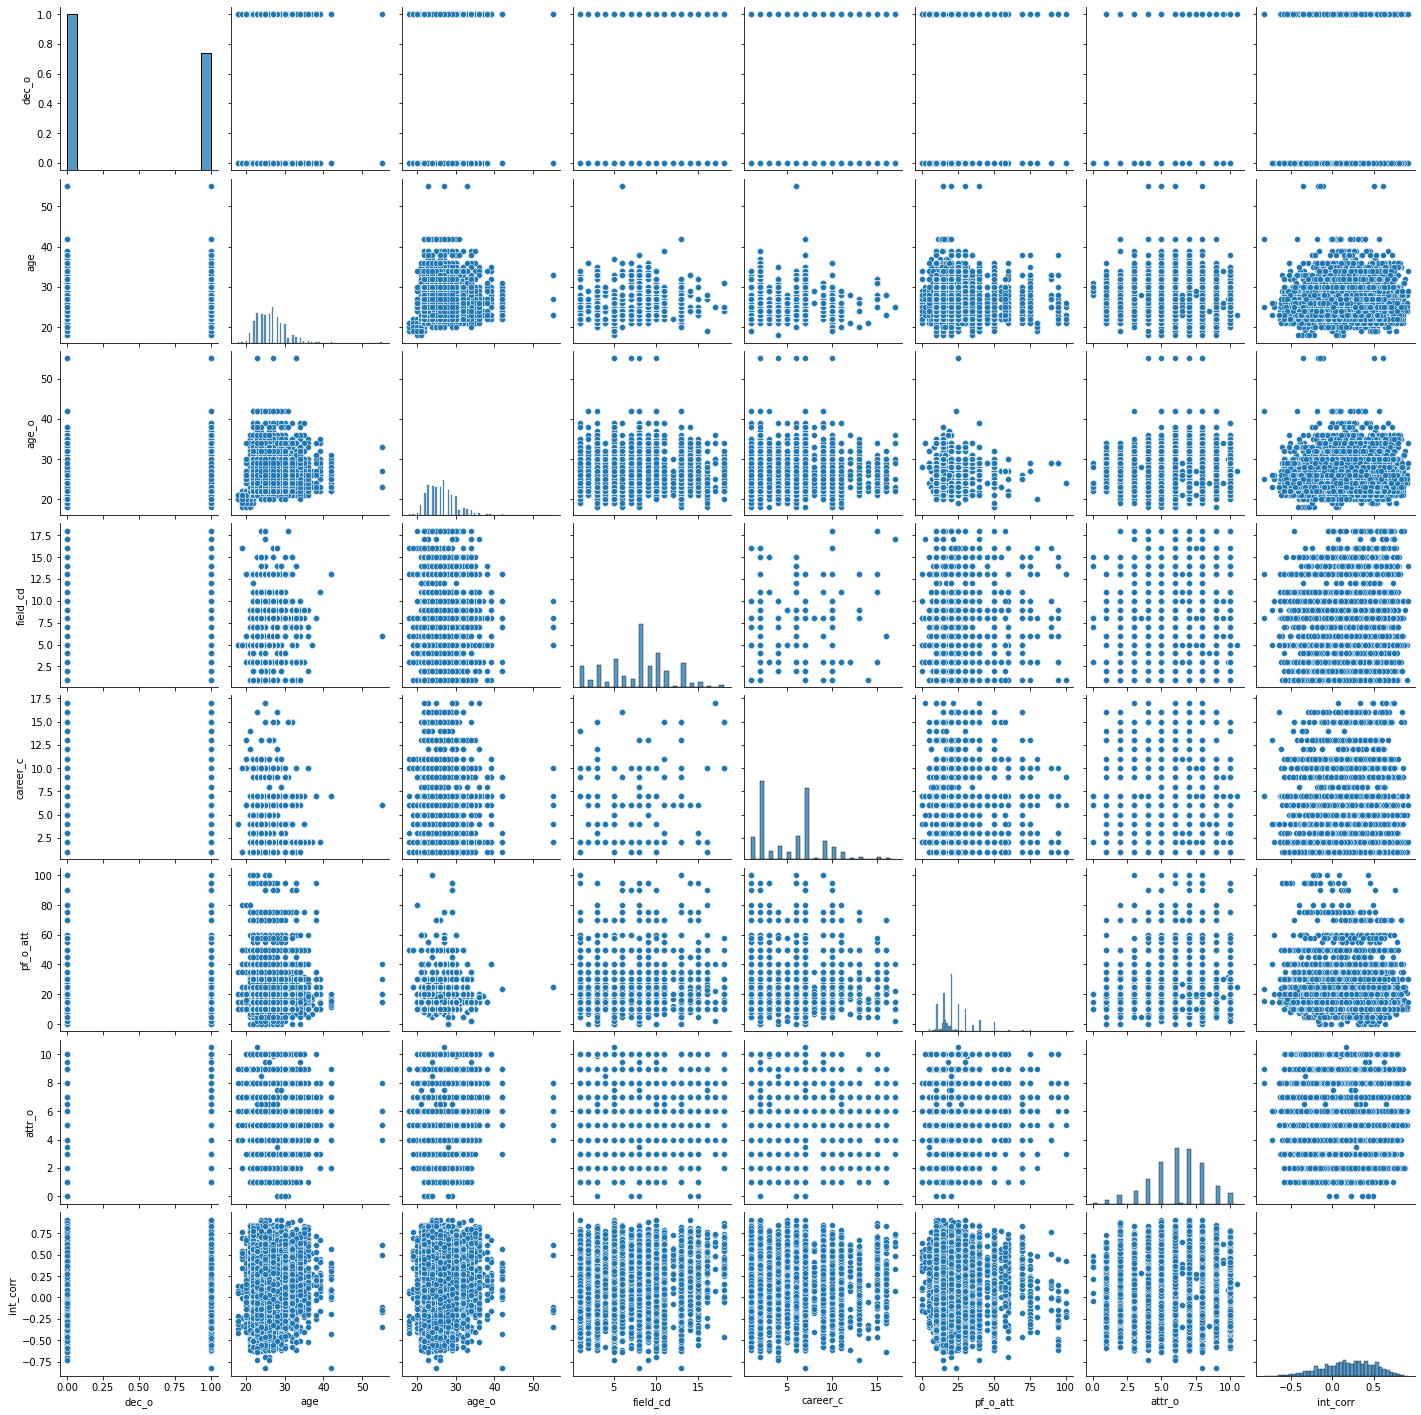

In [ ]:
sns.pairplot(df_sel)
plt.show()

The relation between the variables at first glance neither seems linear nor correlating with each other.

At second glance however, there seem to be certain fields / careers connected to a higher perceived attractiveness (e.g. Architect, where the least attractive candidat

## Predictive model




In [ ]:

X = df_sel[['age','age_o','career_c','field_cd','pf_o_att', 'attr_o', 'int_corr']]
y = df_sel['dec_o']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [ ]:

#create a KNN-classifier with the amount of neighbours defined in X
knn = KNeighborsClassifier(n_neighbors=7) 
#fit the k-nearest neigbor model with the train data
knn = knn.fit(X_train, y_train) 
#calculate the fit on the test data
knn.score(X_test, y_test) 

0.6638584667228307

## Evaluation


####Confusion Matrix

In [ ]:
y_test_pred = knn.predict(X_test) 
# determine number of correct and incorrect predictions
c_matrix = confusion_matrix(y_test, y_test_pred) 
c_matrix

array([[996, 346],
       [452, 580]])

In [ ]:
# Match the correct column 
knn.classes_

array([0, 1])

0 = No, 1 = Yes

In [ ]:
c_matrix_output = pd.DataFrame(c_matrix, index=['Decision: No', 'Decision: Yes'], columns = ['Predicted Decision: No', 'Predicited Decision: Yes']) 
c_matrix_output

,Predicted Decision: No,Predicited Decision: Yes
Decision: No,996,346
Decision: Yes,452,580


## Conclusion

While the prediction could be a bit more accurate, it is exciting to see that career choice/academic background does seem to have an effect on partner choice - 

And this despite initial doubts about how I should learn from the pair plot. In the end, the model succeeds in predicting with 66% probability how the person will decide, based on career, educational background and other factors. 

Although I now have a better understanding, the "How?" is still a big question mark. It is clear to me that everything is following mathematical formulas and thus adheres to a logic. However, the application still feels too much like a black box for me, which takes me that sense of control I'm usually experiencing when coding. I'm sure however this will resolve on the long run. 

